Proyek Analisis Data https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

**Nama: Ayub Subagiya**
**Email: ayubsubagiya@gmail.com**

Business Questions

**What is the product with the highest number of purchases?**

**What is the level of customer satisfaction with the service?**


**How does the purchase data vary each month?**


In [235]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
!pip install -q kaggle
import datetime as dt
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d olistbr/brazilian-ecommerce

mkdir: cannot create directory ‘/root/.kaggle’: File exists
brazilian-ecommerce.zip: Skipping, found more recently modified local copy (use --force to force download)


In [236]:
# read zip
zip_ref = zipfile.ZipFile('brazilian-ecommerce.zip', 'r')
# extrak dataset zip dan memasukannya pada folder datasets
zip_ref.extractall('datasets/')
#mengakhiri penggunaan file ZIP yang telah dibuka dengan library zipfile di Python
zip_ref.close()

In [237]:
df_customers=pd.read_csv('/content/datasets/olist_customers_dataset.csv')
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [238]:
df_geolocation=pd.read_csv('/content/datasets/olist_geolocation_dataset.csv')
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [239]:
df_order_items=pd.read_csv('/content/datasets/olist_order_items_dataset.csv')
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [240]:
df_order_payment=pd.read_csv('/content/datasets/olist_order_payments_dataset.csv')
df_order_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [241]:
df_order_reviews=pd.read_csv('/content/datasets/olist_order_reviews_dataset.csv')
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [242]:
df_orders=pd.read_csv('/content/datasets/olist_orders_dataset.csv')
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [243]:
df_products=pd.read_csv('/content/datasets/olist_products_dataset.csv')
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [244]:
df_sellers=pd.read_csv('/content/datasets/olist_sellers_dataset.csv')
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [245]:
df_product_category=pd.read_csv('/content/datasets/product_category_name_translation.csv')
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [246]:
df_products.info()
df_geolocation.info()
df_order_items.info()
df_order_payment.info()
df_order_reviews.info()
df_orders.info()
df_products.info()
df_sellers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       -------

In [247]:
df_product_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [248]:
df_customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [249]:
df_geolocation.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [250]:
df_order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [251]:
df_order_payment.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [252]:
df_order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [253]:

df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [254]:
df_products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [255]:
df_sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [256]:

df_product_category.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [257]:
print(f'total duplicate customers        = {df_customers.duplicated().sum()}\n'
      f'total duplicate geolocation      = {df_geolocation.duplicated().sum()}\n'
      f'total duplicate order items      = {df_order_items.duplicated().sum()}\n'
      f'total duplicate order payment    = {df_order_payment.duplicated().sum()}\n'
      f'total duplicate order review     = {df_order_reviews.duplicated().sum()}\n'
      f'total duplicate order            = {df_orders.duplicated().sum()}\n'
      f'total duplicate products         = {df_products.duplicated().sum()}\n'
      f'total duplicate seller           = {df_sellers.duplicated().sum()}\n'
      f'total duplicate product category = {df_product_category.duplicated().sum()}\n'
      )

total duplicate customers        = 0
total duplicate geolocation      = 261831
total duplicate order items      = 0
total duplicate order payment    = 0
total duplicate order review     = 0
total duplicate order            = 0
total duplicate products         = 0
total duplicate seller           = 0
total duplicate product category = 0



In [258]:
df_customers.describe()


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [259]:
df_geolocation.describe()


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [260]:
df_order_items.describe()


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [261]:
df_order_payment.describe()


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [262]:
df_order_reviews.describe()


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [263]:
df_orders.describe()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [264]:
df_products.describe()


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [265]:
df_sellers.describe()


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [266]:
df_product_category.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [267]:
orders_col=[
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
for col in orders_col:
    df_orders[col]=pd.to_datetime(df_orders[col])

In [268]:
order_review_col=['review_creation_date','review_answer_timestamp']
for col in order_review_col:
    df_order_reviews[col]=pd.to_datetime(df_order_reviews[col])

In [269]:
order_item_col=['shipping_limit_date']
for col in order_item_col:
    df_order_items[col]=pd.to_datetime(df_order_items[col])

In [270]:
df_geolocation.duplicated().sum()

261831

In [271]:
df_geolocation.drop_duplicates(inplace=True)

In [272]:
df_geolocation.duplicated().sum()

0

In [273]:
df_order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [274]:
df_order_reviews["review_comment_title"].fillna("No Title", inplace=True)
df_order_reviews["review_comment_message"].fillna("No Message", inplace=True)

In [275]:
df_order_reviews.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [276]:
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [277]:
df_products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [278]:
df_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [279]:
df_customers.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [280]:
df_customers.groupby(by='customer_city')['customer_id'].nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [281]:
df_geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000155,99965,-28.180655,-52.034367,agua santa,RS
1000156,99950,-28.072188,-52.011272,tapejara,RS
1000157,99950,-28.068864,-52.012964,tapejara,RS
1000158,99950,-28.068639,-52.010705,tapejara,RS


In [282]:
(df_geolocation['geolocation_city']=='são paulo').sum()




19718

In [283]:

(df_geolocation['geolocation_city']=='são paulo').sum()
df_geolocation.groupby(by=['geolocation_city','geolocation_state'])['geolocation_zip_code_prefix'].size().sort_values(ascending=False).reset_index()

,geolocation_city,geolocation_state,geolocation_zip_code_prefix
0,sao paulo,SP,79926
1,rio de janeiro,RJ,35175
2,são paulo,SP,19717
3,belo horizonte,MG,19474
4,curitiba,PR,11263
...,...,...,...
8458,damião,PB,1
8459,davinópolis,GO,1
8460,são camilo,PR,1
8461,nova redencao bahia,BA,1


In [284]:
df_order_payment.groupby(by='payment_type')['order_id'].size().sort_values(ascending=False)

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: order_id, dtype: int64

In [285]:
df_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [286]:
cust_orders_df = pd.merge(
    left=df_customers,
    right=df_orders,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
cust_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [287]:
new_df_products=pd.merge(
    left=df_products,
    right=df_product_category,
    how='left',
    left_on='product_category_name',
    right_on='product_category_name'
)

In [288]:
col = new_df_products.pop('product_category_name_english')
new_df_products.insert(2, col.name, col)
new_df_products.head()

,product_id,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [289]:
df_order_payment.sample(15)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
45544,9ae081992e9b8d305a8959fa5507ffe9,1,boleto,1,41.75
102414,6220b40639ab71c71d26a9ce7d5905c7,1,boleto,1,243.85
1833,38636a6a86131fe2c507943a16833350,1,credit_card,8,151.18
21142,1e69dcdcbc094d39d6ba64248af906fb,1,credit_card,3,186.49
98553,1323fc7bc118e902322367ce662344ba,1,credit_card,6,140.63
72382,56b58249ffb3737fd1083df765e0838d,1,credit_card,2,149.76
5335,ddd2d769f053c55c39e69fcace5f5eb5,1,credit_card,1,83.24
99855,5260ac84bdd23400bd774a4507093208,1,boleto,1,514.92
30827,9950ec4daabde8b94541d6e0fc19f702,1,credit_card,6,65.09
78833,3e93ed8410f3fa2cd639ec11c30de523,1,boleto,1,74.03


In [290]:
df_sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [291]:
m1=pd.merge(
    left=cust_orders_df,
    right=df_order_payment,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
m1.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,credit_card,8.0,252.25


In [292]:
m2=pd.merge(
    left=m1,
    right=df_order_items,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
m2.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,credit_card,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,credit_card,8.0,335.48,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,credit_card,7.0,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,credit_card,1.0,173.30,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,credit_card,8.0,252.25,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [293]:
m3=pd.merge(
    left=m2,
    right=new_df_products,
    how='left',
    left_on='product_id',
    right_on='product_id'
)
m3.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,credit_card,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,credit_card,8.0,335.48,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,utilidades_domesticas,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,credit_card,7.0,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,office_furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,credit_card,1.0,173.30,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,office_furniture,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,credit_card,8.0,252.25,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,casa_conforto,home_confort,61.0,407.0,1.0,5200.0,45.0,15.0,35.0


In [294]:
m4=pd.merge(
    left=m3,
    right=df_sellers,
    how='left',
    left_on='seller_id',
    right_on='seller_id'
)
m4.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,credit_card,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,credit_card,8.0,335.48,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,utilidades_domesticas,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,credit_card,7.0,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,office_furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,credit_card,1.0,173.30,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,office_furniture,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,credit_card,8.0,252.25,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,casa_conforto,home_confort,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,14940.0,ibitinga,SP


In [295]:
pd.set_option('display.max_columns', None)

In [296]:
all_df=pd.merge(
    left=m4,
    right=df_order_reviews,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
all_df


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,credit_card,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,88b8b52d46df026a9d1ad2136a59b30b,4.0,No Title,No Message,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,credit_card,8.0,335.48,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,utilidades_domesticas,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303.0,itajai,SC,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,No Title,No Message,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,credit_card,7.0,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,office_furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,8577.0,itaquaquecetuba,SP,5ad6695d76ee186dc473c42706984d87,5.0,No Title,No Message,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,credit_card,1.0,173.30,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,office_furniture,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,8577.0,itaquaquecetuba,SP,059a801bb31f6aab2266e672cab87bc5,5.0,No Title,No Message,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,credit_card,8.0,252.25,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,casa_conforto,home_confort,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,14940.0,ibitinga,SP,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,1.0,credit_card,6.0,88.78,1.0,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88,livros_interesse_geral,books_general

In [297]:
all_df.describe()

,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,review_score
count,119143.000000,119140.000000,119140.000000,119140.000000,118310.000000,118310.000000,118310.000000,116601.000000,116601.000000,116601.000000,118290.000000,118290.000000,118290.000000,118290.000000,118310.000000,118146.000000
mean,35033.451298,1.094737,2.941246,172.735135,1.196543,120.646603,20.032387,48.767498,785.967822,2.205161,2112.250740,30.265145,16.619706,23.074799,24442.410413,4.015582
std,29823.198969,0.730141,2.777848,267.776077,0.699489,184.109691,15.836850,10.033540,652.584121,1.717452,3786.695111,16.189367,13.453584,11.749139,27573.004511,1.400436
min,1003.000000,1.000000,0.000000,0.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,1.000000
25%,11250.000000,1.000000,1.000000,60.850000,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000,4.000000
50%,24240.000000,1.000000,2.000000,108.160000,1.000000,74.900000,16.280000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000,5.000000
75%,58475.000000,1.000000,4.000000,189.240000,1.000000,134.900000,21.180000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,27972.000000,5.000000
max,99990.000000,29.000000,24.000000,13664.080000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000,5.000000


In [298]:
all_df['order_purchase_timestamp'].max()
all_df['order_purchase_timestamp'].min()
#Y-M-D
now=dt.datetime(2018,10,20)
#now=dt.datetime(2018,9,3)
all_df['order_purchase_timestamp'].max()

Timestamp('2018-10-17 17:30:18')

In [299]:
""" all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])

rfm = all_df.groupby('customer_id',as_index=False).agg({
     'order_purchase_timestamp' : lambda x : (now - x.max()).days,
    'order_id': lambda x : len(x),
    'price': lambda x : x.sum()
}) """


" all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])\n\nrfm = all_df.groupby('customer_id',as_index=False).agg({\n     'order_purchase_timestamp' : lambda x : (now - x.max()).days,\n    'order_id': lambda x : len(x),\n    'price': lambda x : x.sum() \n}) "

In [300]:
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])

# Group by 'customer_id' and calculate Recency, Frequency, and Monetary
recency = (now - all_df.groupby('customer_id')['order_purchase_timestamp'].max()).dt.days
frequency = all_df.groupby('customer_id')['order_id'].count()
monetary = all_df.groupby('customer_id')['price'].sum()

# Create a new DataFrame with the calculated metrics
rfm = pd.DataFrame({
    'customer_id': recency.index,
    'Recency': recency.values,
    'Frequency': frequency.values,
    'Monetary': monetary.values
})

In [301]:
col_list = ['customer_id','Recency','Frequency','Monetary']
rfm.columns = col_list

In [302]:
rfm.sort_values(by='Recency',ascending=True)

,customer_id,Recency,Frequency,Monetary
63970,a4b417188addbc05b26b72d5e44837a1,2,1,0.00
51713,856336203359aa6a61bf3826f7d84c49,3,1,0.00
29531,4c2ec60c29d10c34bd49cb88aa85cfc4,16,1,0.00
74611,bf6181a85bbb4115736c0a8db1a53be3,18,1,0.00
15595,2823ffda607a2316375088e0d00005ec,20,1,0.00
...,...,...,...,...
68946,b106b360fe2ef8849fbbd056f777b4d5,747,1,100.00
52277,86dc2ffce2dfff336de2f386a786e574,764,3,134.97
38013,622e13439d6b5a0b486c435618b2679e,766,1,0.00
40289,683c54fc24d40ee9f8a6fc179fd9856c,774,1,59.50


In [303]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  99441 non-null  object 
 1   Recency      99441 non-null  int64  
 2   Frequency    99441 non-null  int64  
 3   Monetary     99441 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.0+ MB


In [304]:
rfm.sort_values(by='Monetary',ascending=False)

,customer_id,Recency,Frequency,Monetary
8546,1617b1357756262bfa56ab541c47bc16,385,8,13440.00
60184,9af2372a1e49340278e7c1ef8d749f34,547,29,11383.95
86603,de832e8dbb1f588a47013e53feaa67cc,508,15,10856.10
38590,63b964e79dee32a3587651701a2b8dbf,247,24,9888.00
43009,6f241d5bbb142b6f764387c8c270645a,162,7,9520.14
...,...,...,...,...
70386,b4bade0909a2956cbeef036f6fd7b95e,274,1,0.00
33389,5645f6b97d3740bc2846f27af1fe973f,218,1,0.00
70474,b4f3d737d8ec2ad8a4e85fc6e578a4fc,434,1,0.00
33344,56252fddbb6af46b87f5a070d68afd95,166,1,0.00


In [305]:
rfm.sort_values(by='Recency',ascending=False)

,customer_id,Recency,Frequency,Monetary
3354,08c5351a6aca1c1589a38f244edeee9d,775,2,72.89
40289,683c54fc24d40ee9f8a6fc179fd9856c,774,1,59.50
38013,622e13439d6b5a0b486c435618b2679e,766,1,0.00
52277,86dc2ffce2dfff336de2f386a786e574,764,3,134.97
68946,b106b360fe2ef8849fbbd056f777b4d5,747,1,100.00
...,...,...,...,...
15595,2823ffda607a2316375088e0d00005ec,20,1,0.00
74611,bf6181a85bbb4115736c0a8db1a53be3,18,1,0.00
29531,4c2ec60c29d10c34bd49cb88aa85cfc4,16,1,0.00
51713,856336203359aa6a61bf3826f7d84c49,3,1,0.00


In [306]:
rfm.sort_values(by='Frequency',ascending=False)

,customer_id,Recency,Frequency,Monetary
15183,270c23a11d024a44c896d1894b261a83,437,63,2305.38
7586,13aa59158da63ba0e93ec6ac2c07aacb,391,38,3039.62
60184,9af2372a1e49340278e7c1ef8d749f34,547,29,11383.95
56942,92cd3ec6e2d643d4ebd0e3d6238f69e2,499,26,1299.74
81894,d22f25a9fadfb1abbc2e29395b1239f4,160,24,359.76
...,...,...,...,...
35433,5b9d5dfe6b754261741fb68772efed93,258,1,22.99
35432,5b99d2ac45d9e913fa37e13a7e73f1fc,458,1,59.90
35431,5b985c8b77fba94494956d5f1e717933,164,1,120.00
35429,5b97e86cf344fc8159321fe9a84dbef9,537,1,139.90


In [307]:
all_df.groupby(by=['customer_state','product_category_name_english']).agg({
        'price':'sum',

}).sort_values(by='price', ascending=False)

price
customer_state product_category_name_english           
SP             bed_bath_table                 509313.30
               health_beauty                  475928.29
               watches_gifts                  450822.51
               sports_leisure                 403732.12
               computers_accessories          360210.34
...                                                 ...
AL             drinks                             15.49
BA             home_comfort_2                     12.90
ES             home_comfort_2                     12.90
PR             home_comfort_2                     12.90
MS             costruction_tools_tools             6.80

[1356 rows x 1 columns]

In [308]:
all_df.groupby(by=['customer_city','product_category_name_english']).agg({
        'price':'sum',

}).sort_values(by='price', ascending=False)

price
customer_city    product_category_name_english             
sao paulo        health_beauty                    195263.02
                 bed_bath_table                   184140.58
                 watches_gifts                    172269.07
                 sports_leisure                   154139.05
                 computers_accessories            147079.12
...                                                     ...
areal            pet_shop                              5.50
tupa             construction_tools_construction       3.99
palmeira d'oeste computers_accessories                 3.90
caldas novas     fashion_underwear_beach               3.90
hortolandia      construction_tools_construction       0.85

[25199 rows x 1 columns]

In [309]:
all_df.groupby(by=['review_score'])['customer_id'].size().reset_index().sort_values(ascending=False,by='review_score')

,review_score,customer_id
4,5.0,66343
3,4.0,22319
2,3.0,9894
1,2.0,4162
0,1.0,15428


In [310]:
all_df=pd.merge(
    left=all_df,
    right=rfm,
    how='left',
    right_on='customer_id',
    left_on='customer_id'

)
all_df.sample(15)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,Recency,Frequency,Monetary
10079,fdb9a2ae0b1ecf02a74a34e53f41d653,7015aa90b614805531839b6c2229e928,18271,tatui,SP,3e7ca74af2e30d9f16183f5c9d65ef85,unavailable,2017-08-13 13:53:18,2017-08-15 03:25:25,NaT,NaT,2017-09-01,1.0,boleto,1.0,101.12,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d205cbdec5803e27f07ddd858201c7df,1.0,No Title,No Message,2017-09-06 00:00:00,2017-09-06 10:46:10,432,1,0.00
83627,5133dfd79e71fc9244e60dde0bb6229a,4b4c2d367706e25e519323e9d57271b6,13171,sumare,SP,8ef3801f58da6b652a3082e1fa5b6589,delivered,2018-03-11 09:17:14,2018-03-11 10:09:05,2018-03-14 17:41:11,2018-03-19 17:06:45,2018-03-28,1.0,credit_card,2.0,129.15,1.0,0c71252f37443403376d2008034a7240,f5f1f2c5f923f36ad79ea1d07185ddc9,2018-03-15 09:30:30,115.90,13.25,pet_shop,pet_shop,41.0,947.0,1.0,156.0,18.0,10.0,14.0,19820.0,taruma,SP,3a146d6748a8a1d523f5c0a9e8cc3e45,4.0,No Title,No Message,2018-03-20 00:00:00,2018-03-20 20:52:07,222,1,115.90
28569,3da391a1da388e3a46899354d3c8774c,83310fe98ee56bbaf1cda2332d53dfa2,36570,vicosa,MG,33d3a462459921b054d39254daa7e60d,delivered,2018-05-17 09:16:13,2018-05-17 10:04:25,2018-05-17 13:20:00,2018-06-04 21:58:32,2018-06-08,1.0,credit_card,8.0,159.81,1.0,e11f4a093cbabf75a2eb06a5748bf359,a67780aba9dd436e7ac0aa1f889e73ec,2018-05-23 10:04:25,132.80,27.01,esporte_lazer,sports_leisure,36.0,1360.0,1.0,2450.0,25.0,8.0,25.0,19027.0,presidente prudente,SP,a0ca1013e22c9a42716763d01c2bcb25,4.0,No Title,.,2018-06-05 00:00:00,2018-06-06 11:36:52,155,1,132.80
71329,92cd3ec6e2d643d4ebd0e3d6238f69e2,569aa12b73b5f7edeaa6f2a01603e381,3266,sao paulo,SP,ccf804e764ed5650cd8759557269dc13,delivered,2017-06-07 12:05:10,2017-06-09 16:15:08,2017-06-16 15:50:28,2017-06-22 16:04:46,2017-06-28,19.0,voucher,1.0,1.68,1.0,8d37ee446981d3790967d0268d6cfc81,1900267e848ceeba8fa32d80c1a5f5a8,2017-06-15 16:15:08,49.99,12.69,cama_mesa_banho,bed_bath_table,60.0,640.0,1.0,1100.0,16.0,10.0,16.0,14940.0,ibitinga,SP,8823bba1e3301fee652eb06de8ef9435,5.0,No Title,No Message,2017-06-23 00:00:00,2017-06-28 18:49:50,499,26,1299.74
88373,57475ecf56f8bafe4d5c20f2477f944b,e9ba3a04ddc50b089d9e2ef3d09d25af,23017,rio de janeiro,RJ,715cf0bf4a5b1cfaaf01d77a000d4c8e,delivered,2017-08-19 11:46:23,2017-08-19 12:04:31,2017-08-21 21:30:00,2017-09-02 15:47:50,2017-09-13,1.0,credit_card,4.0,137.08,1.0,66a0a6e02b7f543e5b021ce361f267d4,7a67c85e85bb2ce8582c35f2203ad736,2017-08-24 12:04:31,119.99,17.09,cool_stuff,cool_stuff,45.0,798.0,1.0,1500.0,50.0,40.0,30.0,3426.0,sao paulo,SP,a4e6ea9ce6f0021735c13c4a741b406a,3.0,No Title,No Message,2017-09-03 00:00:00,2017-09-05 22:21:57,426,1,119.99
14457,c6effe6fa35c9e0cbd5e9cf161fa2389,ffb2ae2aa0951d0885d7cd9a218b0c46,23058,rio de janeiro,RJ,4e0e014841788909971877b03ce929b1,delivered,2018-02-21 13:39:33,2018-02-23 02:10:46,2018-02-26 23:43:37,2018-03-13 21:41:19,2018-03-13,1.0,boleto,1.0,137.60,1.0,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,2018-03-01 02:10:46,122.99,14.61,NaN,NaN,NaN,NaN,NaN,400.0,20.0,12.0,15.0,7133.0,guarulhos,SP,944f5836a3801388f4ea9ffb635b790d,5.0,No Title,No Message,2018-03-14 00:00:00,2018-03-15 01:47:08,240,1,122.99
87172,ef1a418be86c78a53772a03837ca33e0,a094a6c432a9738d5b69481a80347458,12241,sao jose dos campos,SP,6fcb95e455e8f30ce414c08f4a31ccd5,delivered

In [311]:
all_df.to_csv('all_data.csv', index=False)

In [312]:
all_df
product_id_counts = all_df.groupby('product_category_name_english')['product_id'].count().reset_index()
sorted_df = product_id_counts.sort_values(by='product_id', ascending=False)

sorted_df


,product_category_name_english,product_id
7,bed_bath_table,11988
43,health_beauty,10032
65,sports_leisure,9004
39,furniture_decor,8832
15,computers_accessories,8150
...,...,...
3,arts_and_craftmanship,24
52,la_cuisine,16
11,cds_dvds_musicals,14
29,fashion_childrens_clothes,8


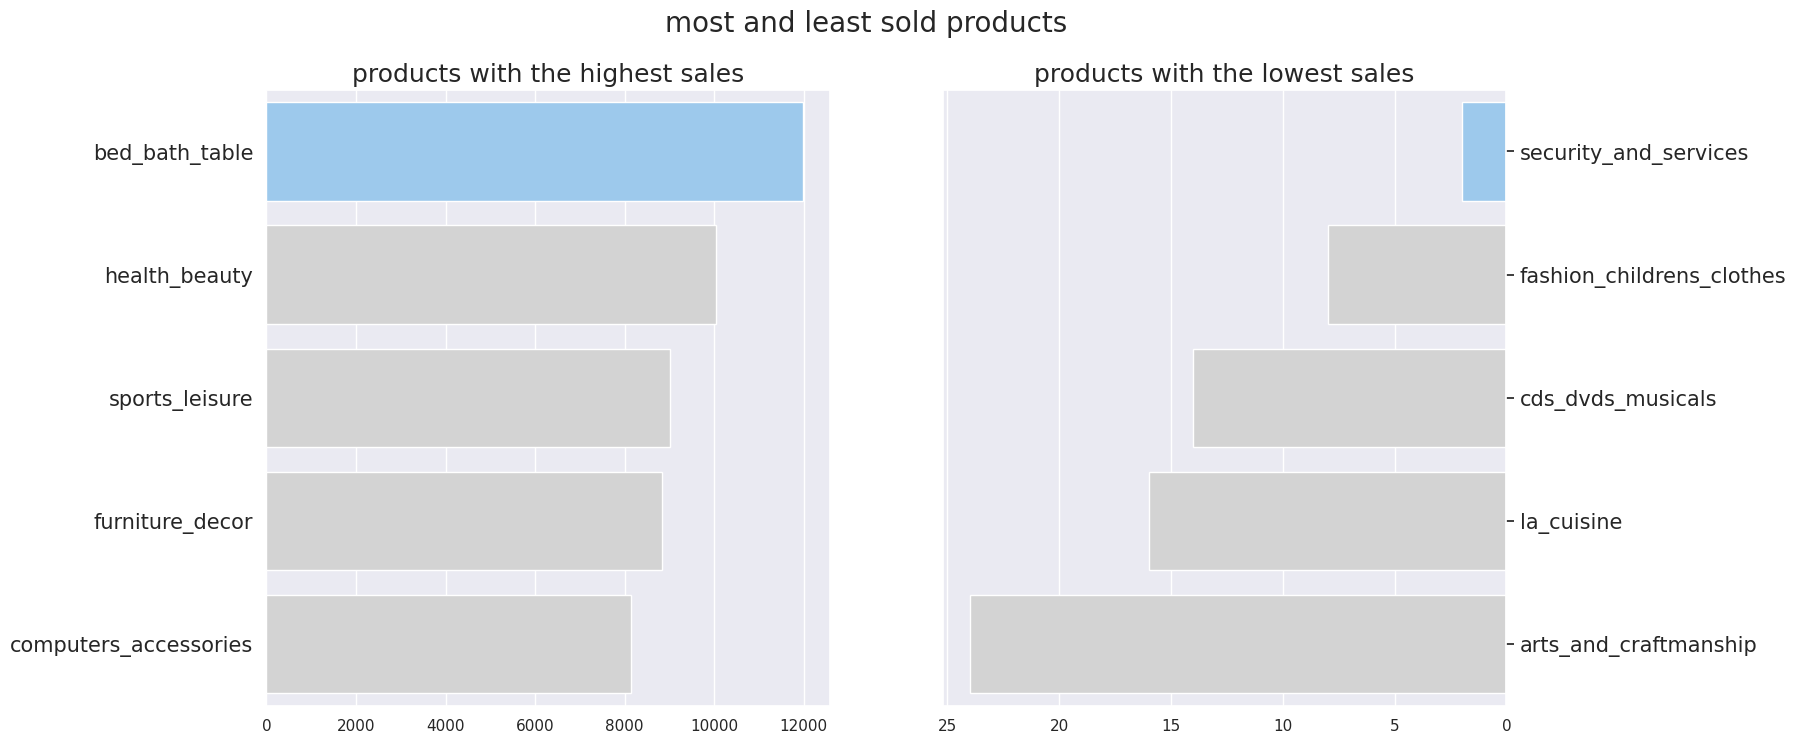

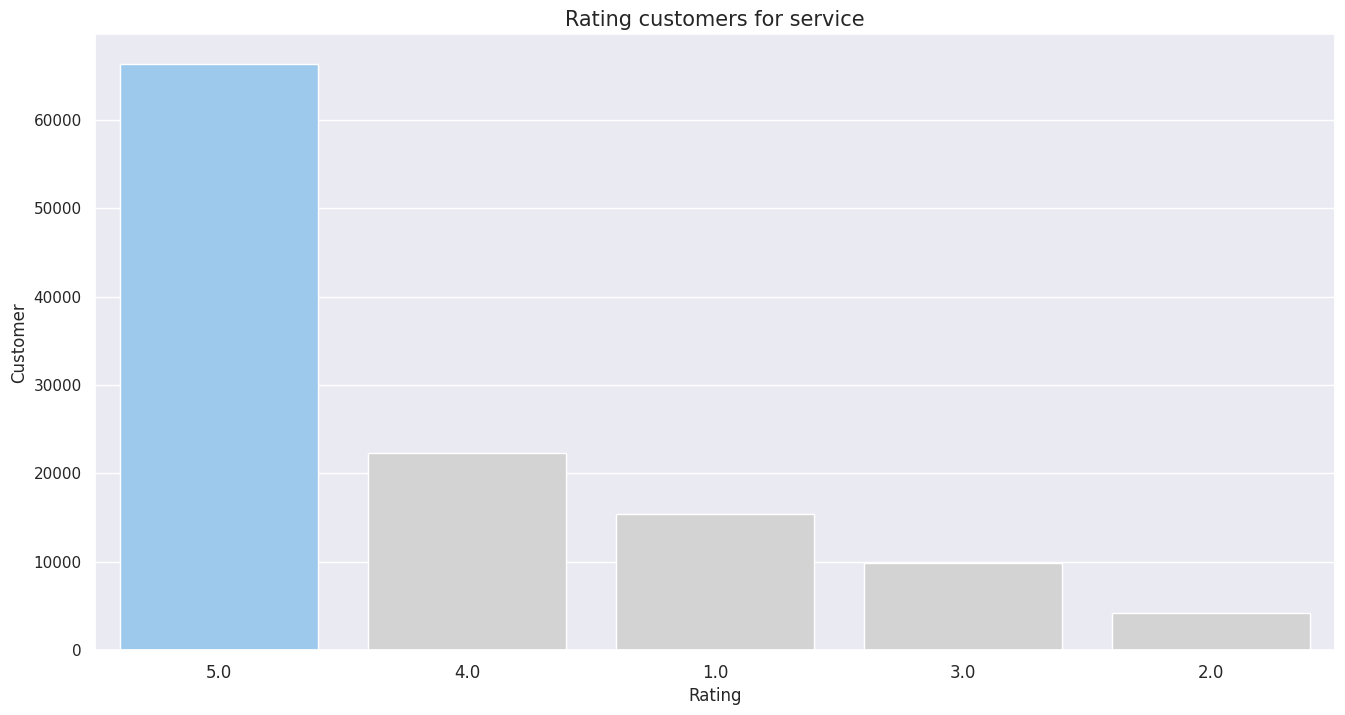

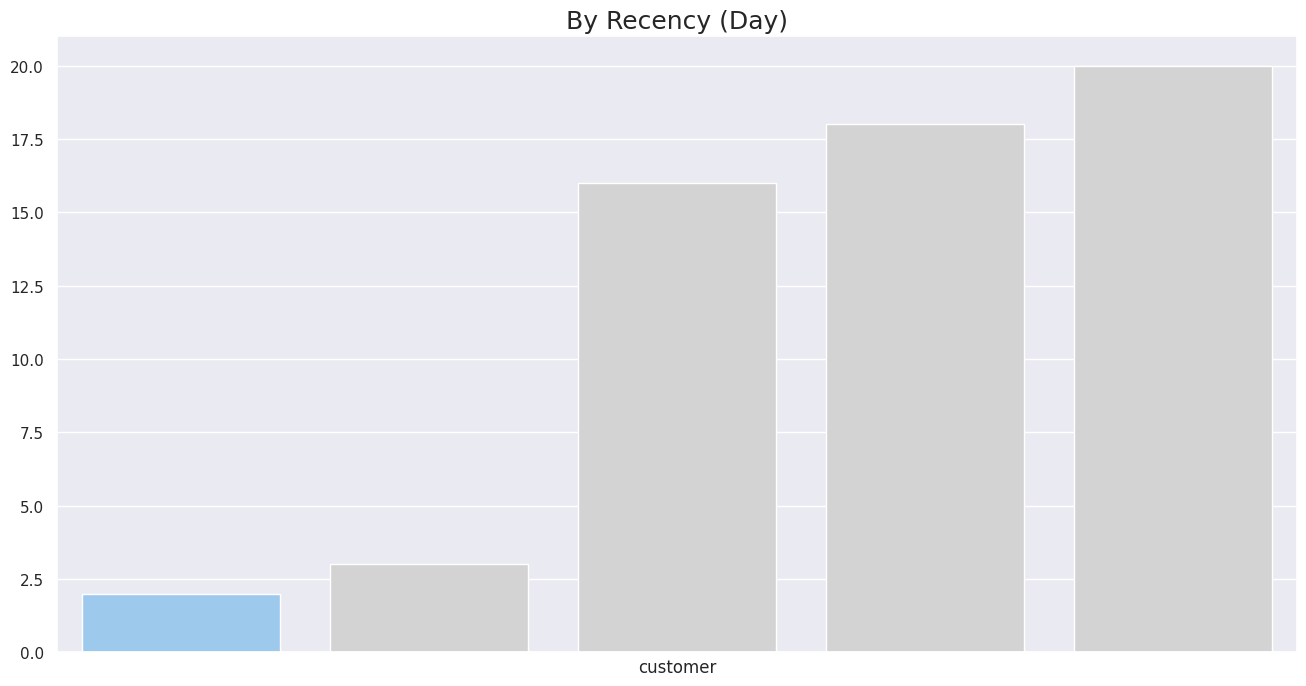

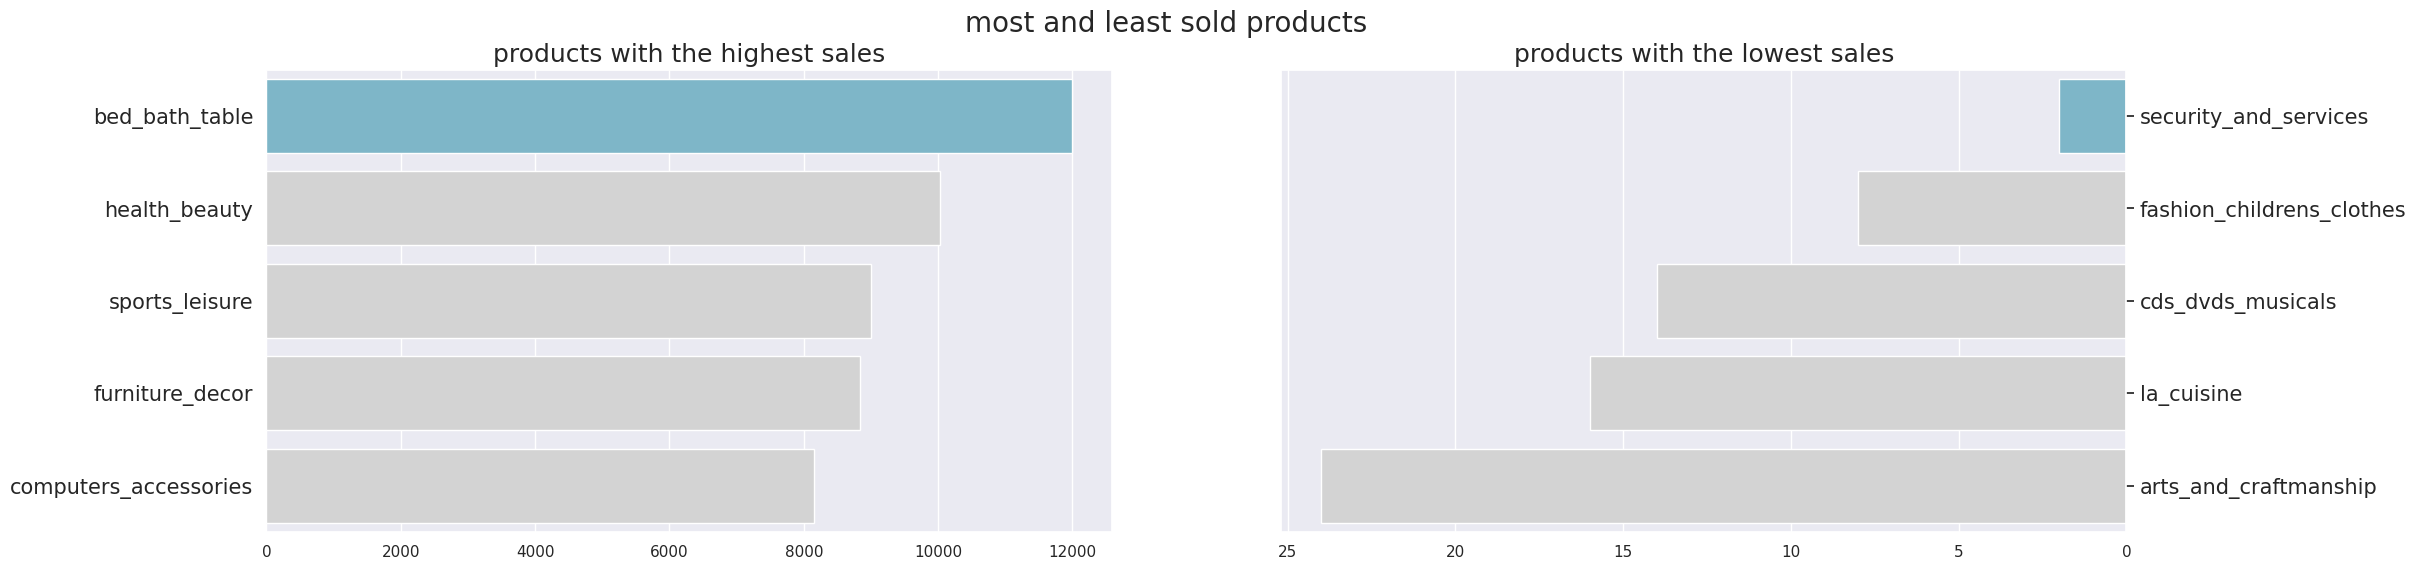

In [313]:

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="product_id", y="product_category_name_english", data=sorted_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("products with the highest sales", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="product_id", y="product_category_name_english", data=sorted_df.sort_values(by="product_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("products with the lowest sales", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("most and least sold products", fontsize=20)
plt.show()


In [314]:
x=all_df['review_score'].value_counts().sort_values(ascending=False)

In [315]:
x.index
x.values

array([66343, 22319, 15428,  9894,  4162])

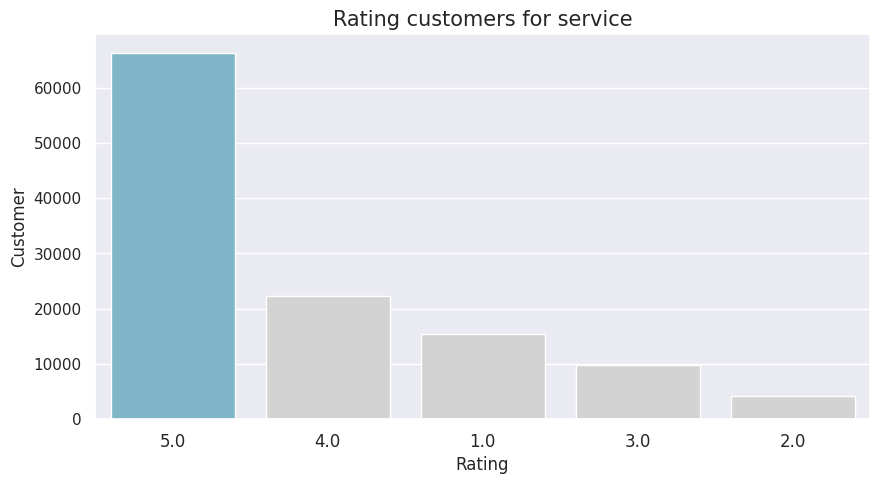

In [316]:
rating_service = all_df['review_score'].value_counts().sort_values(ascending=False)

max_score = rating_service.idxmax()

sns.set(style="darkgrid")

plt.figure(figsize=(10, 5))
sns.barplot(x=rating_service.index,
            y=rating_service.values,
            order=rating_service.index,
            palette=["#72BCD4" if score == max_score else "#D3D3D3" for score in rating_service.index]
            )

plt.title("Rating customers for service", fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Customer")
plt.xticks(fontsize=12)
plt.show()


In [317]:
all_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,Recency,Frequency,Monetary
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,credit_card,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,88b8b52d46df026a9d1ad2136a59b30b,4.0,No Title,No Message,2017-05-26,2017-05-30 22:34:40,521,1,124.99
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,credit_card,8.0,335.48,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,utilidades_domesticas,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303.0,itajai,SC,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,No Title,No Message,2018-01-30,2018-02-10 22:43:29,280,1,289.00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,credit_card,7.0,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,office_furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,8577.0,itaquaquecetuba,SP,5ad6695d76ee186dc473c42706984d87,5.0,No Title,No Message,2018-06-15,2018-06-15 12:10:59,153,1,139.94
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,credit_card,1.0,173.30,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,office_furniture,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,8577.0,itaquaquecetuba,SP,059a801bb31f6aab2266e672cab87bc5,5.0,No Title,No Message,2018-03-29,2018-04-02 18:36:47,220,1,149.94
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,credit_card,8.0,252.25,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,casa_conforto,home_confort,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,14940.0,ibitinga,SP,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52,82,1,230.00


In [318]:
sum_spend_df = all_df.resample(rule='M', on='order_approved_at').agg({
            "price": "sum"
})
sum_spend_df = sum_spend_df.reset_index()
sum_spend_df.rename(columns={
            "price": "total_spend"
        }, inplace=True)

sum_spend_df

,order_approved_at,total_spend
0,2016-09-30,134.97
1,2016-10-31,51201.31
2,2016-11-30,0.00
3,2016-12-31,10.90
4,2017-01-31,124313.26
5,2017-02-28,262281.82
6,2017-03-31,394384.70
7,2017-04-30,390306.86
8,2017-05-31,550323.59
9,2017-06-30,461045.05


In [319]:
sum_spend_df['order_approved_at'] = sum_spend_df['order_approved_at'].dt.strftime('%B')

sum_spend_df


,order_approved_at,total_spend
0,September,134.97
1,October,51201.31
2,November,0.00
3,December,10.90
4,January,124313.26
5,February,262281.82
6,March,394384.70
7,April,390306.86
8,May,550323.59
9,June,461045.05


In [320]:
sum_spend_df = sum_spend_df.sort_values('total_spend').drop_duplicates('order_approved_at', keep='last')
sum_spend_df

,order_approved_at,total_spend
12,September,654698.76
13,October,704026.32
15,December,795824.02
17,February,882417.57
22,July,908431.56
23,August,909806.29
21,June,914410.56
16,January,986284.61
19,April,1010481.51
14,November,1039022.61


In [321]:
custom_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Create a categorical column based on the custom order
sum_spend_df['month_cat'] = pd.Categorical(sum_spend_df['order_approved_at'], categories=custom_order, ordered=True)

# Sort the DataFrame based on the categorical column
sorted_df = sum_spend_df.sort_values(by='month_cat')

# Remove the 'month_cat' column if you don't need it
sorted_df = sorted_df.drop(columns=['month_cat'])

print(sorted_df)

   order_approved_at  total_spend
16           January    986284.61
17          February    882417.57
18             March   1039716.71
19             April   1010481.51
20               May   1056093.87
21              June    914410.56
22              July    908431.56
23            August    909806.29
12         September    654698.76
13           October    704026.32
14          November   1039022.61
15          December    795824.02


In [322]:
#total spend
sum_spend_df['total_spend'].sum()

10901214.39

In [323]:
#average spend
sum_spend_df['total_spend'].mean()


908434.5325000001

In [324]:

monthly_df = all_df.resample(rule='M', on='order_approved_at').agg({
    "order_id": "size",
})
monthly_df

,order_id
order_approved_at,
2016-09-30,3
2016-10-31,398
2016-11-30,0
2016-12-31,1
2017-01-31,984
2017-02-28,2104
2017-03-31,3263
2017-04-30,2845
2017-05-31,4471


In [325]:
monthly_df.index

DatetimeIndex(['2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30'],
              dtype='datetime64[ns]', name='order_approved_at', freq=None)

In [326]:
monthly_df.index = monthly_df.index.strftime('%B') #mengubah format order_approved_at menjadi Tahun-Bulan
monthly_df = monthly_df.reset_index()
monthly_df.rename(columns={
    "order_id": "order_count",
}, inplace=True)
monthly_df

,order_approved_at,order_count
0,September,3
1,October,398
2,November,0
3,December,1
4,January,984
5,February,2104
6,March,3263
7,April,2845
8,May,4471
9,June,3863


In [327]:
monthly_df = monthly_df.sort_values('order_count').drop_duplicates('order_approved_at', keep='last')

In [328]:
monthly_df

,order_approved_at,order_count
12,September,5211
13,October,5630
15,December,6846
22,July,7234
21,June,7391
23,August,7672
17,February,8041
19,April,8075
20,May,8497
16,January,8541


In [329]:

month_mapping = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

monthly_df["month_numeric"] = monthly_df["order_approved_at"].map(month_mapping)
monthly_df = monthly_df.sort_values("month_numeric")
monthly_df = monthly_df.drop("month_numeric", axis=1)

In [330]:
monthly_df

,order_approved_at,order_count
16,January,8541
17,February,8041
18,March,8705
19,April,8075
20,May,8497
21,June,7391
22,July,7234
23,August,7672
12,September,5211
13,October,5630


In [331]:
monthly_df[monthly_df['order_count'] == monthly_df['order_count'].max()]['order_approved_at'].values[0]

'November'

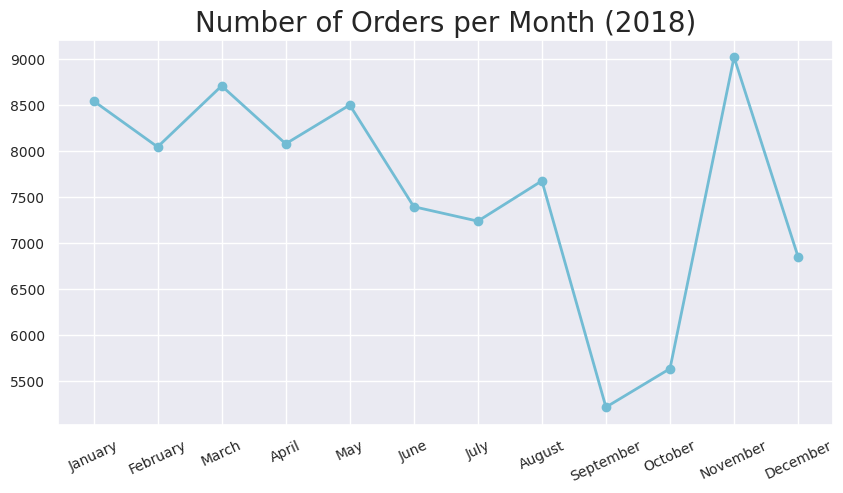

In [332]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_df["order_approved_at"],
    monthly_df["order_count"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Number of Orders per Month (2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10)
plt.show()

In [333]:
all_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,Recency,Frequency,Monetary
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,credit_card,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,88b8b52d46df026a9d1ad2136a59b30b,4.0,No Title,No Message,2017-05-26,2017-05-30 22:34:40,521,1,124.99
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,credit_card,8.0,335.48,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,utilidades_domesticas,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303.0,itajai,SC,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,No Title,No Message,2018-01-30,2018-02-10 22:43:29,280,1,289.00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,credit_card,7.0,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,office_furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,8577.0,itaquaquecetuba,SP,5ad6695d76ee186dc473c42706984d87,5.0,No Title,No Message,2018-06-15,2018-06-15 12:10:59,153,1,139.94
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,credit_card,1.0,173.30,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,office_furniture,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,8577.0,itaquaquecetuba,SP,059a801bb31f6aab2266e672cab87bc5,5.0,No Title,No Message,2018-03-29,2018-04-02 18:36:47,220,1,149.94
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,credit_card,8.0,252.25,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,casa_conforto,home_confort,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,14940.0,ibitinga,SP,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52,82,1,230.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,1.0,credit_card,6.0,88.78,1.0,ccb4503d9d43d245d3b295d0544f988

In [334]:
sum_spend_df

,order_approved_at,total_spend,month_cat
12,September,654698.76,September
13,October,704026.32,October
15,December,795824.02,December
17,February,882417.57,February
22,July,908431.56,July
23,August,909806.29,August
21,June,914410.56,June
16,January,986284.61,January
19,April,1010481.51,April
14,November,1039022.61,November


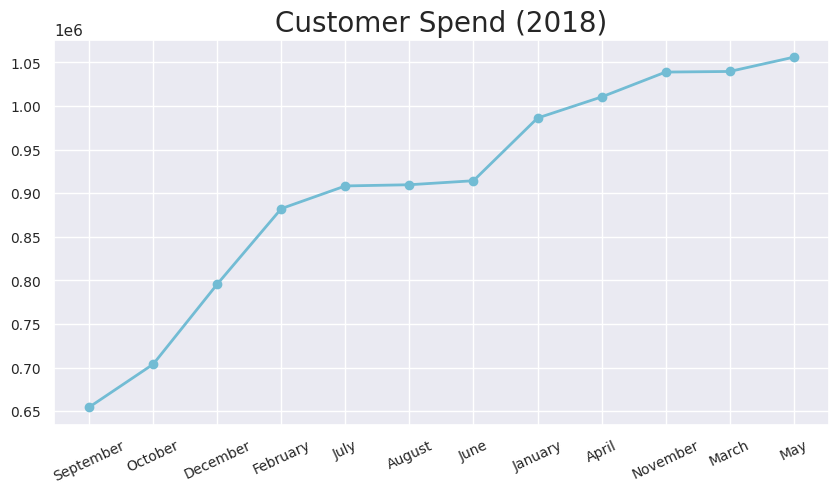

In [335]:
plt.figure(figsize=(10, 5))
plt.plot(
    sum_spend_df["order_approved_at"],
    sum_spend_df["total_spend"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Customer Spend (2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10)
plt.show()

In [336]:
rfm
rfm.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  99441 non-null  object 
 1   Recency      99441 non-null  int64  
 2   Frequency    99441 non-null  int64  
 3   Monetary     99441 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.0+ MB


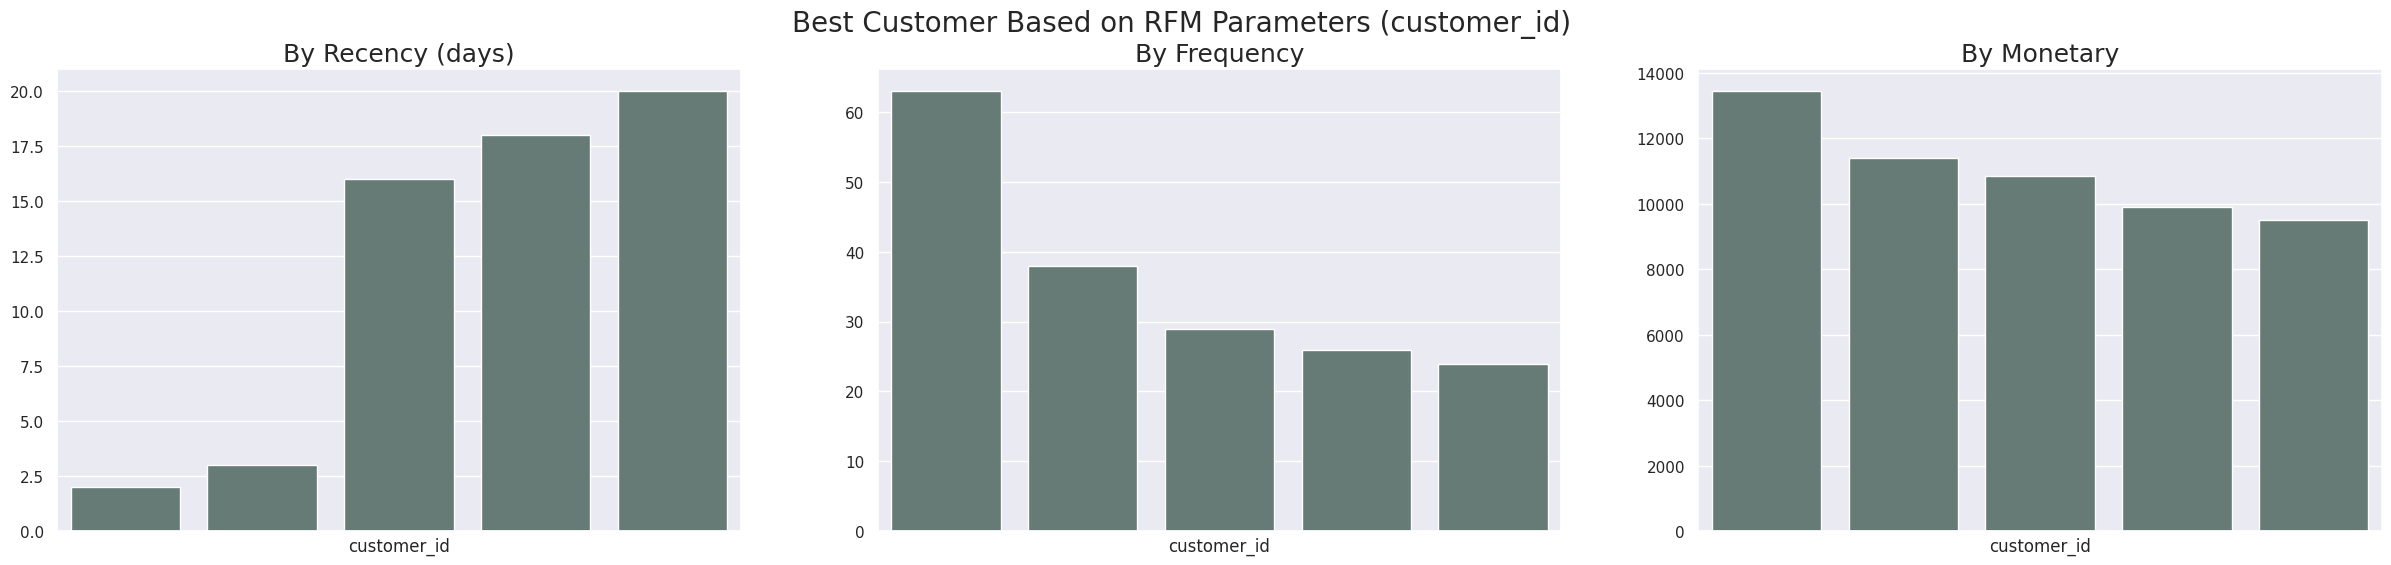

In [337]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#637E76", "#637E76", "#637E76", "#637E76", "#637E76"]

# beri comentar pada ax[index].set_xticks([]) bila ingin melihat customer nya by id


sns.barplot(y="Recency", x="customer_id", data=rfm.sort_values(by="Recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("customer_id")
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[0].set_xticks([])


sns.barplot(y="Frequency", x="customer_id", data=rfm.sort_values(by="Frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel('customer_id')
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].set_xticks([])


sns.barplot(y="Monetary", x="customer_id", data=rfm.sort_values(by="Monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel('customer_id')
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[2].set_xticks([])


plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

**What is the product with the highest number of purchases?**
Based on the visualized data, "beth_bad_table" is the product with the highest number of purchases, while "security_and_service" has the smallest number of purchases.

**What is the level of customer satisfaction with the service?**
The level of customer satisfaction is generally satisfactory, as evidenced by the visualized data. Most customers give a perfect rating of 5, with an average rating of around 4 when rounded.

**How does the purchase data vary each month?**
The purchase data for customers is fluctuating, meaning that the value of customer purchases varies each month, sometimes increasing and sometimes decreasing. Based on the data, the maximum peak of customer purchases occurs in November, while the minimum peak occurs in September.

# **DEPLOYING STREAMLIT **

In [349]:
!pip install -q streamlit

In [350]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 0.406s

3 packages are looking for funding
  run `npm fund` for details

found 2 moderate severity vulnerabilities
  run `npm audit fix` to fix them, or `npm audit` for details


In [351]:
%%writefile app.py

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from datetime import datetime
import datetime as dt

all_df = pd.read_csv('all_data.csv')



# change type str/obj -> datetime
datetime_columns = ["order_approved_at"]
for column in datetime_columns:
    all_df[column] = pd.to_datetime(all_df[column])

def number_order_per_month(df):
    monthly_df = df.resample(rule='M', on='order_approved_at').agg({
        "order_id": "size",
    })
    monthly_df.index = monthly_df.index.strftime('%B')
    monthly_df = monthly_df.reset_index()
    monthly_df.rename(columns={
        "order_id": "order_count",
    }, inplace=True)
    monthly_df = monthly_df.sort_values('order_count').drop_duplicates('order_approved_at', keep='last')
    month_mapping = {
        "January": 1,
        "February": 2,
        "March": 3,
        "April": 4,
        "May": 5,
        "June": 6,
        "July": 7,
        "August": 8,
        "September": 9,
        "October": 10,
        "November": 11,
        "December": 12
    }

    monthly_df["month_numeric"] = monthly_df["order_approved_at"].map(month_mapping)
    monthly_df = monthly_df.sort_values("month_numeric")
    monthly_df = monthly_df.drop("month_numeric", axis=1)
    return monthly_df

def customer_spend_df(df):
    sum_spend_df = df.resample(rule='M', on='order_approved_at').agg({
            "price": "sum"
    })
    sum_spend_df = sum_spend_df.reset_index()
    sum_spend_df.rename(columns={
                "price": "total_spend"
            }, inplace=True)
    sum_spend_df['order_approved_at'] = sum_spend_df['order_approved_at'].dt.strftime('%B')
    sum_spend_df = sum_spend_df.sort_values('total_spend').drop_duplicates('order_approved_at', keep='last')
    custom_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

    # Create a categorical column based on the custom order
    sum_spend_df['month_cat'] = pd.Categorical(sum_spend_df['order_approved_at'], categories=custom_order, ordered=True)

    # Sort the DataFrame based on the categorical column
    sorted_df = sum_spend_df.sort_values(by='month_cat')

    # Remove the 'month_cat' column if you don't need it
    sorted_df = sorted_df.drop(columns=['month_cat'])
    return sorted_df


def create_by_product_df(df):
    product_id_counts = df.groupby('product_category_name_english')['product_id'].count().reset_index()
    sorted_df = product_id_counts.sort_values(by='product_id', ascending=False)
    return sorted_df

def rating_cust_df(df):
    rating_service = df['review_score'].value_counts().sort_values(ascending=False)

    max_score = rating_service.idxmax()

    df_cust=df['review_score']

    return (rating_service,max_score,df_cust)

def create_rfm(df):
    now=dt.datetime(2018,10,20)



    #alternate code 1
    #df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
    #rfm = df.groupby('customer_id',as_index=False).agg({
    #    'order_purchase_timestamp' : lambda x : (now - x.max()).days,
    #    'order_id': lambda x : len(x),
    #    'price': lambda x : x.sum()
    #})

    #alternate code 2
    df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
    # Group by 'customer_id' and calculate Recency, Frequency, and Monetary
    recency = (now - df.groupby('customer_id')['order_purchase_timestamp'].max()).dt.days
    frequency = df.groupby('customer_id')['order_id'].count()
    monetary = df.groupby('customer_id')['price'].sum()

    # Create a new DataFrame with the calculated metrics
    rfm = pd.DataFrame({
        'customer_id': recency.index,
        'Recency': recency.values,
        'Frequency': frequency.values,
        'Monetary': monetary.values
    })
    #End alternative 2

    col_list = ['customer_id','Recency','Frequency','Monetary']
    rfm.columns = col_list
    return rfm




with st.sidebar:


    st.image("https://upload.wikimedia.org/wikipedia/commons/7/77/Streamlit-logo-primary-colormark-darktext.png")

    # Define the URL and link text
    url = "https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce"
    link_text = "Visit Kaggle Dataset "

    # Create the link
    st.write('Brazilian E-Commerce Public Dataset')
    st.write(f"[{link_text}]({url})")




# calling functions
daily_orders_df=number_order_per_month(all_df)
most_and_least_products_df=create_by_product_df(all_df)
rating_service,max_score,df_rating_service=rating_cust_df(all_df)
customer_spend_df=customer_spend_df(all_df)
rfm=create_rfm(all_df)



st.header('Brazilian E-Commerce Public Dataset :sparkles:')




st.subheader('Monthly Orders')
col1, col2 = st.columns(2)

with col1:
    high_order_num = daily_orders_df['order_count'].max()
    high_order_month=daily_orders_df[daily_orders_df['order_count'] == daily_orders_df['order_count'].max()]['order_approved_at'].values[0]
    st.markdown(f"Highest orders in {high_order_month} : **{high_order_num}**")

with col2:
    low_order = daily_orders_df['order_count'].min()
    low_order_month=daily_orders_df[daily_orders_df['order_count'] == daily_orders_df['order_count'].min()]['order_approved_at'].values[0]
    st.markdown(f"Lowest orders in {low_order_month} : **{low_order}**")

fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(
    daily_orders_df["order_approved_at"],
    daily_orders_df["order_count"],
    marker='o',
    linewidth=2,
    color="#90CAF9",
)
plt.xticks(rotation=45)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=15)

st.pyplot(fig)


st.subheader('Customer Spend')
col1, col2 = st.columns(2)

with col1:
    total_spend=customer_spend_df['total_spend'].sum()
    formatted_total_spend = "%.2f" % total_spend
    st.markdown(f"Total Spend : **{formatted_total_spend}**")

with col2:
    avg_spend=customer_spend_df['total_spend'].mean()
    formatted_avg_spend = "%.2f" % avg_spend
    st.markdown(f"Average Spend : **{formatted_avg_spend}**")

plt.figure(figsize=(16, 8))
min_total_spend = customer_spend_df['total_spend'].min()
max_total_spend = customer_spend_df['total_spend'].max()

plt.axhline(y=max_total_spend, color='blue', linestyle='-', linewidth=0.5, label=f'Max ({max_total_spend:.2f})')
plt.axhline(y=min_total_spend, color='red', linestyle='-', linewidth=0.5, label=f'Min ({min_total_spend:.2f})')
sns.barplot(
    x='order_approved_at',
    y='total_spend',
    data=customer_spend_df,
    #marker='o',
    #linewidth=2,
    linestyle='-',
    color="#9ADE7B",

)
plt.xlabel('')
plt.ylabel('Total Spend')
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10)
plt.legend()
st.pyplot(plt)



st.subheader("Most And Least Product")
col1, col2 = st.columns(2)

with col1:
    highest_product_sold=most_and_least_products_df['product_id'].max()
    st.markdown(f"Higest Number : **{highest_product_sold}**")

with col2:
    lowest_product_sold=most_and_least_products_df['product_id'].min()
    st.markdown(f"Lowest Number : **{lowest_product_sold}**")

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

colors = ["#9ADE7B", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

#sns.barplot(x="product_id", y="product_category_name_english", data=most_and_least_products_df.head(5),hue="product_category_name_english", palette=colors, ax=ax[0],)


sns.barplot(
    x="product_id",
    y="product_category_name_english",
    data=most_and_least_products_df.head(5),
    palette=colors,
    ax=ax[0],
    )
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].set_title("products with the highest sales", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(
    x="product_id",
    y="product_category_name_english",
    data=most_and_least_products_df.sort_values(by="product_id", ascending=True).head(5),
    palette=colors,
    ax=ax[1],)
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("products with the lowest sales", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("most and least sold products", fontsize=20)
st.pyplot(fig)


st.subheader("Rating Customer By Service")
st.markdown(f"Rating Average  : **{df_rating_service.mean():.2f}**")



plt.figure(figsize=(16, 8))
sns.barplot(
            x=rating_service.index,
            y=rating_service.values,
            order=rating_service.index,
            palette=["#9ADE7B" if score == max_score else "#D3D3D3" for score in rating_service.index],
            #palette=["#9ADE7B"]

            )

plt.title("Rating customers for service", fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Customer")
plt.xticks(fontsize=12)
st.pyplot(plt)

st.subheader("RFM Best Value")


colors = ["#9ADE7B", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# beri comentar pada ax[index].set_xticks([]) bila ingin melihat customer nya by id

######################################3
tab1, tab2, tab3 = st.tabs(["Recency", "Frequency", "Monetary"])

with tab1:
    plt.figure(figsize=(16, 8))
    sns.barplot(
        y="Recency",
        x="customer_id",
        data=rfm.sort_values(by="Recency", ascending=True).head(5),
        palette=colors,

        )
    plt.title("By Recency (Day)", loc="center", fontsize=18)
    plt.ylabel('')
    plt.xlabel("customer")
    plt.tick_params(axis ='x', labelsize=15)
    plt.xticks([])
    st.pyplot(plt)

with tab2:
    plt.figure(figsize=(16, 8))
    sns.barplot(
        y="Frequency",
        x="customer_id",
        data=rfm.sort_values(by="Frequency", ascending=False).head(5),
        palette=colors,

        )
    plt.ylabel('')
    plt.xlabel("customer")
    plt.title("By Frequency", loc="center", fontsize=18)
    plt.tick_params(axis ='x', labelsize=15)
    plt.xticks([])
    st.pyplot(plt)

with tab3:
    plt.figure(figsize=(16, 8))
    sns.barplot(
        y="Monetary",
        x="customer_id",
        data=rfm.sort_values(by="Monetary", ascending=False).head(5),
        palette=colors,
        )
    plt.ylabel('')
    plt.xlabel("customer")
    plt.title("By Monetary", loc="center", fontsize=18)
    plt.tick_params(axis ='x', labelsize=15)
    plt.xticks([])
    st.pyplot(plt)



Overwriting app.py


In [352]:
!streamlit run app.py &>/content/logs.txt &

In [353]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 34.82.69.200


Password/Enpoint IP for localtunnel digunakan untuk submit endpoint di url dibawah setelah dijalankan

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 3.233s
your url is: https://silent-phones-bathe.loca.lt
